In [1]:
import pandas as pd
import os

data_dir = '/workspace/media/Udacity/projects/CarND-Behavioral-Cloning-P3/train-straight+curve+recover'
data_csv = os.path.join(data_dir, 'driving_log.csv')

df = pd.read_csv(data_csv, header='infer')
df

,center,left,right,steering,throttle,brake,speed
0,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000,1.000000,0.0,30.19032
1,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000,1.000000,0.0,30.19031
2,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000,1.000000,0.0,30.19030
3,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000,1.000000,0.0,30.19029
4,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000,1.000000,0.0,30.19029
5,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000,1.000000,0.0,30.19030
6,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000,1.000000,0.0,30.19029
7,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,-0.020484,1.000000,0.0,30.19004
8,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000,1.000000,0.0,30.19033
9,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000,1.000000,0.0,30.19028


In [2]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53bd679390>,
      dtype=object)

In [3]:
images = df[['center', 'left' ,'right']].melt()
data = df[['steering']]
data_repeat = pd.concat([data, data+0.2, data-0.2], ignore_index=True)
df_split = pd.concat([images, data_repeat], axis=1)
df_split

,variable,value,steering
0,center,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000
1,center,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000
2,center,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000
3,center,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000
4,center,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000
5,center,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000
6,center,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000
7,center,/Users/thomasmelanson/Documents/Udacity/assign...,-0.020484
8,center,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000
9,center,/Users/thomasmelanson/Documents/Udacity/assign...,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53bd2c9d30>]],
      dtype=object)

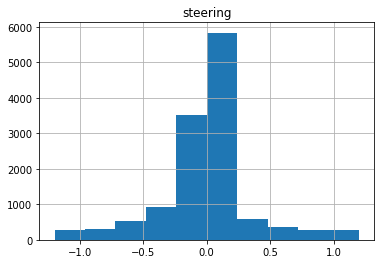

In [4]:
df_split.hist()

In [5]:
print(df_split.nlargest(5, 'steering'))
print(df_split.nsmallest(5, 'steering'))

      variable                                   value  steering
11634     left    IMG/left_2016_12_01_13_38_42_894.jpg  1.200000
11672     left    IMG/left_2016_12_01_13_38_46_752.jpg  1.200000
3598    center  IMG/center_2016_12_01_13_38_42_894.jpg  1.000000
3636    center  IMG/center_2016_12_01_13_38_46_752.jpg  1.000000
11797     left    IMG/left_2016_12_01_13_38_59_461.jpg  0.931557
      variable                                   value  steering
20115    right   IMG/right_2016_12_01_13_39_28_024.jpg -1.142695
20116    right   IMG/right_2016_12_01_13_39_28_126.jpg -1.142695
20114    right   IMG/right_2016_12_01_13_39_27_924.jpg -1.133238
19511    right   IMG/right_2016_12_01_13_38_26_805.jpg -1.123744
19512    right   IMG/right_2016_12_01_13_38_26_906.jpg -1.009811


2


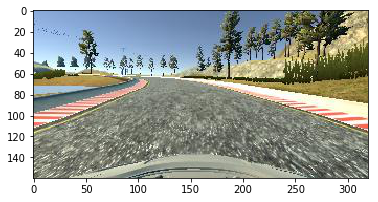

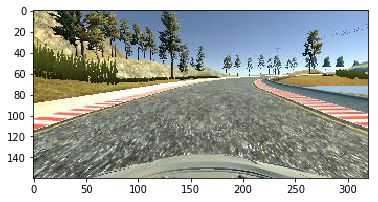

In [20]:
from sklearn.utils import shuffle
from tqdm import tqdm 
from skimage.io import imread, imshow
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def flipped(im_label_pair_gen):
    im_label_pairs = list(im_label_pair_gen)
    im_label_pairs_flipped = [(np.fliplr(im), -label) for im, label in im_label_pairs]
    return im_label_pairs + im_label_pairs_flipped

data_dir = '/workspace/media/Udacity/projects/CarND-Behavioral-Cloning-P3/train-straight+curve+recover'
filename = df['center'][200].split('/')[-1]
im = [imread(os.path.join(data_dir, 'IMG', filename))]
label = [df['steering'][200]]


im_flipped, label_flipped = zip(*flipped(zip(im, label)))

plt.figure()
plt.imshow(im_flipped[0])

print(len(im_flipped))
plt.figure()
plt.imshow(im_flipped[1])

In [6]:
from sklearn.utils import shuffle
from tqdm import tqdm 
from skimage.io import imread, imshow
import numpy as np

def flipped(im_label_pair_gen):
    im_label_pairs = list(im_label_pair_gen)
    im_label_pairs_flipped = [(np.fliplr(im), -label) for im, label in im_label_pairs]
    return im_label_pairs + im_label_pairs_flipped

def augment(images, labels):
    im_label_pairs = zip(images, labels)
    im_label_pairs_proc = flipped(im_label_pairs)
    return zip(*im_label_pairs_proc)
        

# Simple generator for now,
# TODO: upgrade to Keras Sequential
class DatasetGenerator:
    
    def __init__(self, datasize, img_name = 'value', label_name='steering', validation_split=0.2):
        self.data_dir = '/workspace/media/Udacity/projects/CarND-Behavioral-Cloning-P3/data'
        self.validation_split = validation_split
        self.n_samples = datasize
        self.n_train = int((1 - self.validation_split) * self.n_samples)
        self.n_val = self.n_samples - self.n_train
        self.img_name = img_name
        self.label_name = label_name
        
    def getshape(self, df):
        filename = df[self.img_name][0].split('/')[-1]
        im = imread(os.path.join(self.data_dir, 'IMG', filename))
        return im.shape
    
    def generator(self, df, batch_size=32, mode='train'):
        num_samples = self.n_samples
        while 1: # Loop forever so the generator never terminates
            df = shuffle(df)
            # Split dataset into ()
            init = 0 if mode == 'train' else self.n_train
            end  = self.n_train if mode == 'train' else self.n_samples
            for offset in range(init, end, batch_size):
                batch_samples = df[offset:offset+batch_size]

                images = []
                angles = []
                for index, batch_sample in batch_samples.iterrows():
                    filename = batch_sample[self.img_name].split('/')[-1]
                    im = imread(os.path.join(self.data_dir, 'IMG', filename))
                    label = batch_sample[self.label_name]
                    images.append(im)
                    angles.append(label)
                
                images, angles = augment(images, angles)

                # trim image to only see section with road
                X_train = np.array(images)
                y_train = np.array(angles)
                yield shuffle(X_train, y_train)

gen = DatasetGenerator(len(df_split))
gen_train = gen.generator(df_split)
images, labels = next(gen_train)
print(images.shape)
print(labels.shape)

(64, 160, 320, 3)
(64,)


In [7]:
# Iterate through cell
# Input: df : pd.DataFrame
default_data = True
from skimage.io import imread, imshow
from sklearn.model_selection import train_test_split
import numpy as np
import os
from tqdm import tqdm

# if default_data:
#     cam_name = ['left', 'center', 'right']
#     measurement = 'steering'
# else:
#     cam_name = 0 
#     measurement  = 3 

# X_train = list()
# y_train = list()
# for i in tqdm(df.index):
#     for j in range(len(cam_name)):
#         filename = df[cam_name[j]][i].split('/')[-1]
#         im = imread(os.path.join(data_dir, 'IMG', filename))
#         X_train.append(im)
#         y_train.append(df[measurement][i]-0.2*(j-1))
# y_train = np.asarray(y_train)
# X_train = np.asarray(X_train)
# X_train.shape

In [8]:
datagen = DatasetGenerator(len(df_split))
train_generator = datagen.generator(df_split)
validation_generator = datagen.generator(df_split, mode='validate')

In [23]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

i = np.random.randint(len(X_train))
plt.text(.5, 0, "%.02f" % y_train[i])
plt.imshow(X_train[i])

NameError: name 'X_train' is not defined

In [9]:
from keras.layers import Conv2D, MaxPooling2D

def LeNet(inp, n_classes):
    conv1 = Conv2D(6, 5, 5, activation='relu')(inp)
    conv1 = MaxPooling2D()(conv1)
    conv2 = Conv2D(16, 5, 5, activation='relu')(conv1)
    conv2 = MaxPooling2D()(conv2)
    fc0 = Flatten()(conv2)
    fc1 = Dense(120)(fc0)
    fc2 = Dense(84)(fc1)
    return Dense(n_classes)(fc2)


def NvidiaBehavioral(inp, n_classes):
    conv1 = Conv2D(24, 5, 5, activation='relu')(inp)
    conv1 = MaxPooling2D()(conv1)
    conv2 = Conv2D(36, 5, 5, activation='relu')(conv1)
    conv2 = MaxPooling2D()(conv2)
    conv3 = Conv2D(48, 5, 5, activation='relu')(conv2)
    conv3 = MaxPooling2D()(conv3)
    conv4 = Conv2D(64, 3, 3, activation='relu')(conv3)
    conv5 = Conv2D(64, 3, 3, activation='relu')(conv4)
    fc0 = Flatten(conv5)
    fc1 = Dense(100)(fc0)
    fc2 = Dense(50)(fc1)
    fc3 = Dense(10)(fc2)
    return Dense(n_classes)(fc3)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
from keras.layers import Dense, Flatten, Input, Lambda, Cropping2D
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16

# input_shape = X_train.shape[1:]
input_shape = datagen.getshape(df_split)
inp = Input(input_shape)
inp_proc = Lambda(lambda x: x / 255. - 0.5)(inp)
inp_proc = Cropping2D(cropping=((50,20), (0,0)))(inp_proc)
out = LeNet(inp_proc, 1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), activation="relu")`
  


In [21]:
from keras.callbacks import TensorBoard, ModelCheckpoint
from time import strftime, localtime

log_dir = './logs'
chkpt_dir = './chkpt'
if not os.path.exists(chkpt_dir):
    os.makedirs(chkpt_dir)
timestamp = strftime('%Y-%m-%d-%H:%M:%S', localtime())
model_name = 'nvidia_behavioral'
filepath = os.path.join(chkpt_dir, model_name + timestamp)
def get_callbacks():
    tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)

    chkpt = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
    return [tensorboard, chkpt]

In [22]:
model = Model(inp, out)
model.compile( 'adam' , 'mse')
# model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.2, shuffle=True)
model.fit_generator(train_generator, samples_per_epoch= 
            datagen.n_train, validation_data=validation_generator, 
            callbacks = get_callbacks(),
            nb_val_samples=datagen.n_val, nb_epoch=2)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., callbacks=[<keras.ca..., steps_per_epoch=19286, validation_steps=4822, validation_data=<generator..., epochs=2)`
  import sys


Epoch 1/2
19286/19286 [==============================] - 1321s 69ms/step - loss: 0.0054 - val_loss: 0.0049
Epoch 2/2
19286/19286 [==============================] - 1315s 68ms/step - loss: 0.0043 - val_loss: 0.0038


In [1]:
model.save('model.h5')

NameError: name 'model' is not defined

MSE: 0.05048255876539042


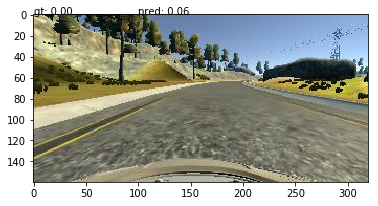

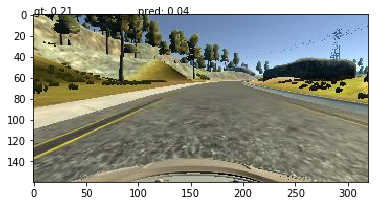

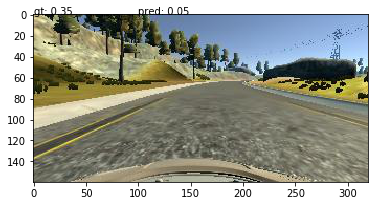

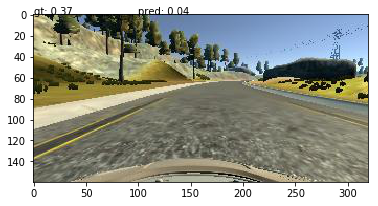

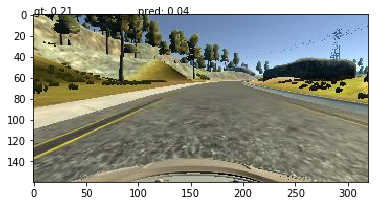

In [40]:
i = np.random.randint(len(X_train))
r = range(i, i+5)
pred_steers = model.predict(X_train[r])
for im, gt_steer, pred_steer in zip(X_train[r], y_train[r], pred_steers):
    plt.figure()
    plt.text(.5, 0, "gt: %.02f" % gt_steer)
    plt.text(100.0, 0, "pred: %.02f" % pred_steer)
    plt.imshow(X_train[i])

print('MSE:', np.mean(np.square((pred_steers - y_train[r]))))